# Part I - Ford GoBike System Data Exploration
## by Adedamola Adedoyin

## Introduction
The Ford GoBike Dataset originally contains 183412 rows of data and 16 columns. Each row represents a ride made in a bike-sharing system around the San Francisco Bay area in the United State, for the month of February 2019. The `duration` column shows how long it takes a rider to go from one station (`start_station`) to another (`end_station`).

Some cleaning will be done to remove rows with missing data and some addition columns will be extracted from the existing ones to create features to aid better data exploration and analysis.


>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling
- Remove rows with nans
- Extract `weekday`, `month`, and `year` columns from the `start_time` column
- Calculate riders `member_age` columns from the riders' birth year column 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Drop nans from the DataFrame
df= df.dropna()

# Convert the data types of the start_ and end_time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Convert the user_type and member_gender to categorical (nominal/unordered) data types
cat_cols = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for col in cat_cols:
    df[col]  = df[col].astype('category')

# Convert some float columns to int
int_cols = ['member_birth_year', 'start_station_id', 'end_station_id']
for col in int_cols:
    df[col]  = df[col].astype(int)
    
# Convert some int columns to objects
object_cols = ['bike_id', 'start_station_id', 'end_station_id']
for col in object_cols:
    df[col]  = df[col].astype(object)
    
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [5]:
# Extract the Start hour and end hour of each ride from the start_time column
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour

# Extract the start weekday of each ride from the start_time column
df['start_weekday'] = df['start_time'].dt.day_name()

# Extract the start day of the month for each ride from the start_time column
df['start_day'] = df['start_time'].dt.day

# Calculate the members' age from their birth year and the year data was recorded (2019)
df['member_age'] = df['start_time'].dt.year - df['member_birth_year']

# Convert ride duration from seconds to mins
df['duration_min'] = round(df['duration_sec']/60, 1)

# Drop irrelevant columns
drop_cols = ['duration_sec', 'member_birth_year',
             'start_station_latitude', 'start_station_longitude', 
             'end_station_latitude', 'end_station_longitude']
df_cut = df.drop(drop_cols, axis = 1)

#Change weekday to ordered categorical data type
ordered_col = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(categories = ordered_col, ordered=True)
df_cut['start_weekday'] = df_cut['start_weekday'].astype(ordered_cat)

df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  object        
 3   start_station_name       174952 non-null  object        
 4   end_station_id           174952 non-null  object        
 5   end_station_name         174952 non-null  object        
 6   bike_id                  174952 non-null  object        
 7   user_type                174952 non-null  category      
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  174952 non-null  category      
 10  start_hour               174952 non-null  int64         
 11  end_hour                 174952 non-null  int64         
 12  start_weekday   

In [6]:
# duplicate cleaned data
bike = df_cut.copy()

### What is the structure of your dataset?
For the dataset the timestamp columns are assumed to be in the local time for San Francisco, since no information was given on this. Also, the `bike_share_for_all_trip` column represents two categories members who are enrolled in a special dicount program for low-income areas.

After the preliminary wrangling, which included dropping rows with nans values, creating and dropping some columns, changing data types, etc., the following is the structure of the current `bike` (`df_cut`) dataset:

- A total of 174952 rows and 16 columns
- All data from February 2019
- There are 4607 unique Bike_id which corresponds to the different number of registered bikes
- There are 329 unique stations (each with a station name) as seen in `start_station_id` and `end_station_id` which corresponds to the different number of stations a ride started from and ended at.
- There are 2 unique user type/categories, namely; Customer and Subscriber
- There are 3 unique members' gender categories, namely; Male, Female, and Other 


### What is/are the main feature(s) of interest in your dataset?

The dataset will be further explored visually in  order to find valuable insights needed for analysis of the **main feature of interest**, Which is the ride duration (in minutes) i.e., `duration_min`. Other features of the dataset will be compared to this to see what features are most inflencial in determining ride duration.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Some of the features that will be explored in relation to the feature of interest include:
- Start and end hour of ride
- The day of the month
- Weekday
- User's membership type
- Member's Gender
- Members' ages

## Univariate Exploration

In [7]:
bike.describe()

,start_hour,end_hour,start_day,member_age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,13.456165,13.609533,15.312337,34.196865,11.733291
std,4.734282,4.748029,8.033926,10.118731,27.370031
min,0.000000,0.000000,1.000000,18.000000,1.000000
25%,9.000000,9.000000,8.000000,27.000000,5.400000
50%,14.000000,14.000000,15.000000,32.000000,8.500000
75%,17.000000,18.000000,22.000000,39.000000,13.200000
max,23.000000,23.000000,28.000000,141.000000,1409.100000


#### An overview of the distribution of numeric features

#### What is the distribution of the main feature of interest?

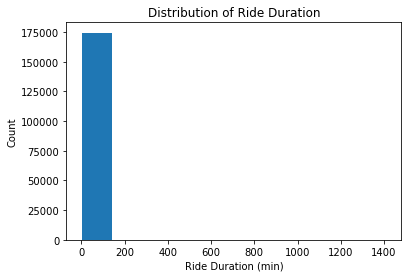

In [8]:
plt.hist(data = bike, x  = 'duration_min')
plt.xlabel('Ride Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Ride Duration');

The histogram shows a single visible bar. This is an indication of a severely right skewed distribution. And adjustment of the bins will definitely be required.

In [9]:
# Remove entries with extreme value of duration
outlier_mask = bike['duration_min'].quantile(0.99)

bike_cut = bike[bike['duration_min'] <= outlier_mask]
# bike_cut.to_csv('bike_cut.csv', index=False)


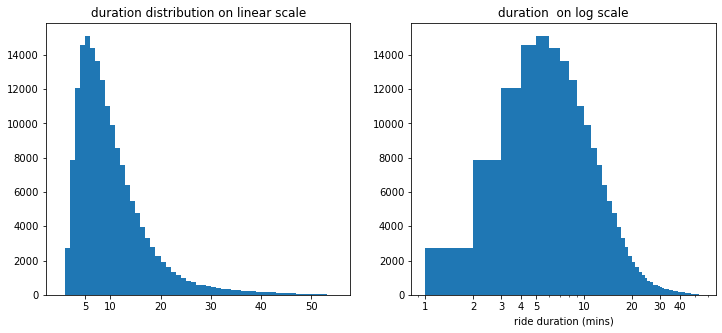

In [10]:
plt.figure(figsize = (12,5))

# left subplot
plt.subplot(121)
plt.hist(data = bike_cut, x  = 'duration_min', bins = range(0,56,1))
plt.xticks([5,10,20,30,40,50], [5,10,20,30,40,50])
plt.title('duration distribution on linear scale');


# right subplot
plt.subplot(122)
plt.hist(data = bike_cut, x  = 'duration_min', bins = range(0,56,1))

# Use a log scale on the x-axis 
plt.xscale('log')
# Set the ticks and ticks label
plt.xticks([1,2,3,4,5,10,20,30,40], [1,2,3,4,5,10,20,30,40])

plt.title('duration  on log scale')
plt.xlabel('ride duration (mins)');


The modal duration frequency appears to be around rides lasting for about 6mins to about 7 mins, and the median duration lies within this range aswell.  The data appears to be significantly right-skewed.

#### Start and End Hours Distribution

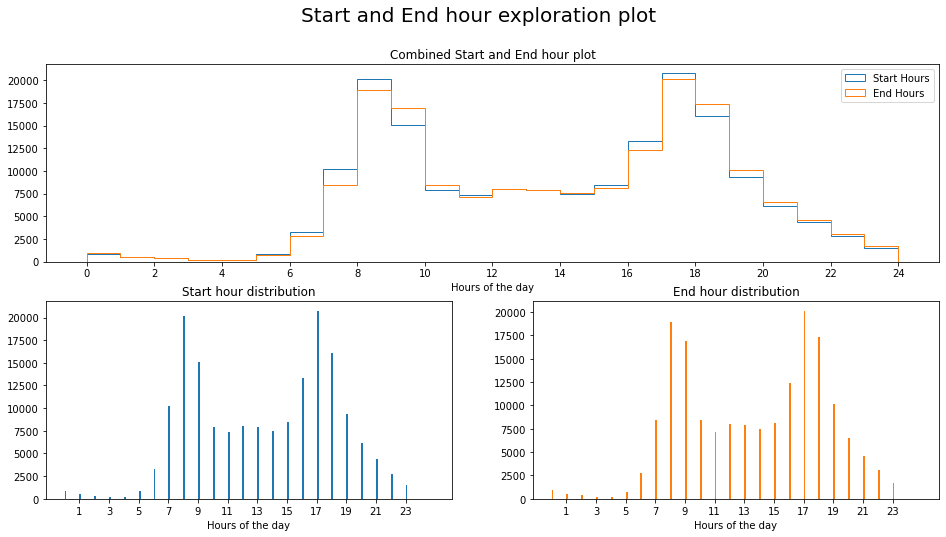

In [11]:
plt.figure(figsize = (16,8))

# Set the overall title of the entire figure

plt.suptitle("Start and End hour exploration plot", fontsize = 20)

# Top subplot (Combined Histogram)
plt.subplot(2,2,(1,2))
plt.hist(bike_cut['start_hour'], bins=np.arange(0,25,1), histtype = 'step', label='Start Hours') # Start hour distribution
plt.xticks(range(0,25,2))
plt.xlabel('Hours of the day')

plt.hist(bike_cut['end_hour'], bins=np.arange(0,25,1), histtype = 'step', label='End Hours') # End hour distribution
plt.xticks(range(0,25,2))
plt.xlabel('Hours of the day')

# Add plot Legend and title
plt.legend()
plt.title('Combined Start and End hour plot');


# Bottom left subplot (Start hour distribution)
plt.subplot(223, title = 'Start hour distribution', xticks = range(1,25,2), xlabel = 'Hours of the day')
plt.hist(bike_cut['start_hour'], bins=np.arange(0,25,0.125))

# Bottom right subplot (End hour distribution)
plt.subplot(224,   title = 'End hour distribution', xticks = range(1,25,2), xlabel = 'Hours of the day')
plt.hist(bike_cut['end_hour'], bins=np.arange(0,25,0.125), color=sb.color_palette()[1]);

The above plot shows a bimodal distribution of the hours of the day that a ride starts (in blue) and ends (in orange). Understandably, the two peak periods are in the morning between the hours of 8am to 9am as members commute to work, and then in the evening, after work, between the hours of 5pm to 6pm.

#### Distribution across the 28 days of February

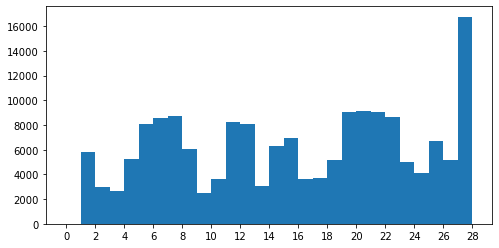

In [12]:
plt.figure(figsize = (8,4))

plt.hist(bike_cut['start_day'], bins=range(0,29,1))
plt.xticks(range(0,29,2));

The distribution for the ride data all through the month shows a few deeps, suspected to be the no work days where people tend to commute less (This will be confirmed in the next plot). The peak is seen at the final day of the month.

#### What day of the week had the most and least rides

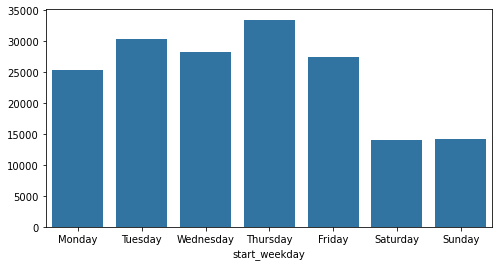

In [13]:
Weekday_group = bike_cut.groupby('start_weekday').count()['bike_id']

# Set the base color (blue)
base_color = sb.color_palette()[0]

plt.figure(figsize = (8,4))

sb.barplot(x = Weekday_group.index, y = Weekday_group.values, color = base_color);

As suspected, Saturday and Sunday (Weekend) both have the least count of rides for the given dataset. This is most likely bacause fewer people go to work on both days compared to the other days. Nevertheless, this might not be the only reason, other factor might be contributing to this obvious difference in ride count. Although a little more than the others, Thursday had the most recorded rides or the 7 weekdays for February 2019.

#### What are the membership types and how are they distributed?

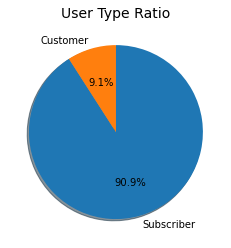

In [14]:
member_type = bike_cut['user_type'].value_counts()

sizes = member_type.values
labels = member_type.index

fig1, ax1 = plt.subplots()
ax1.pie(sizes,autopct='%1.1f%%', shadow=True, labels = labels, startangle=90, counterclock = False)
plt.title('User Type Ratio', fontsize = 14);

#### Check Gender distribution 

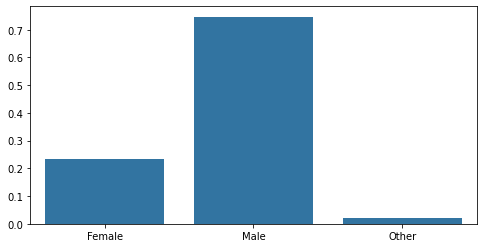

In [15]:
gender_group = bike_cut['member_gender'].value_counts(normalize = True)

plt.figure(figsize = (8,4))
sb.barplot(x = gender_group.index, y = gender_group.values, color = base_color);

From the above plot, the percentage of male riders and female riders were seen to be about 75% to 23% respectively (coresponding to a ratio of 3:1), leaving the percentage of other gender types at about 2%.

In [16]:
# Ratio of users that subscibed to the Bike-Share-For-All program. 
bike_cut['bike_share_for_all_trip'].value_counts(normalize = True)


No     0.901492
Yes    0.098508
Name: bike_share_for_all_trip, dtype: float64

In [17]:
bike_cut.describe()

,start_hour,end_hour,start_day,member_age,duration_min
count,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000
mean,13.454822,13.600159,15.306223,34.191335,10.212023
std,4.739169,4.749123,8.038691,10.112763,7.096984
min,0.000000,0.000000,1.000000,18.000000,1.000000
25%,9.000000,9.000000,8.000000,27.000000,5.400000
50%,14.000000,14.000000,15.000000,32.000000,8.400000
75%,17.000000,18.000000,22.000000,39.000000,13.000000
max,23.000000,23.000000,28.000000,141.000000,52.900000


The above shows that about 90% of member are not subscribed to the program while only about 10% actually subscribed.

#### Inspecting the distribution of members ages

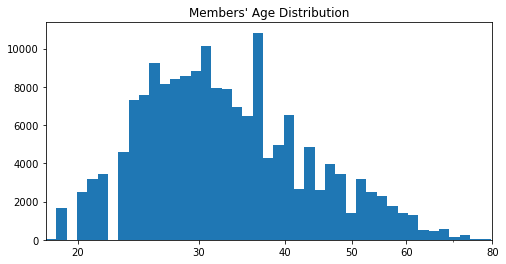

In [18]:
plt.figure(figsize = (8,4))

x_ticks = [ 20, 30, 40, 50, 60,80,100]
min_ = np.log10(bike_cut['member_age']).min()
max_ = np.log10(bike_cut['member_age']).max()
bin_size = 10**np.arange(min_, max_+0.015, 0.015) # set bin size on the log scale
plt.hist(bike_cut['member_age'], bins  = bin_size)
plt.xscale('log') # Use a log scale
plt.xticks(x_ticks, x_ticks)
plt.xlim(18, 80) # limit the x-axis to ages between 18 and 80
plt.title('Members\' Age Distribution');

The age distribution shows a right skew and was hence plotted on a log scale. It appears to be trimodal (3 distinct high frequency age intervals).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration distribution shows a significant outlier at the upper end, with median at about 5mins and highest value  at about 1500mins. After dropping this outlier, the distribution plotted on a log scale showed that the maximum duration frequency appeared  to be around rides lasting for about 4mins to about 7 mins, and the median duration lies within this range. Even with on log scale, the data still appeared to be skewed towards the right.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Of the features explored the follow were worth of noting:
- Start and end hour of ride: There is a close similarity between both of these features as the plot appeared to overlap at several points for an hour (1hr) bin size. This must be due to the fact that 3/4 of the entire distribution is below 14mins in duration, a much smaller bin size of about 0.125hr (7.5mins) shows the distribution.

- The day of the month: The distribution for the ride data all through the month shows a few deeps, suspected to be the no work days where people tend to commute less. The peak is seen at the final day of the month.

- Weekday: As suspected, Saturday and Sunday (Weekend) both have the least count of rides for the given dataset. This is most likely bacause fewer people go to work on both days compared to the other days. Nevertheless, this might not be the only reason, other factor might be contributing to this obvious difference in ride count. Although a little more than the others, Thursday had the most recorded rides or the 7 weekdays for February 2019.

- Member's Gender: The percentage of male riders and female riders were seen to be about 75% to 23% respectively (coresponding to a ratio of 3:1), leaving the percentage of other gender types at about 2%.

- Members' ages: The age distribution shows a right skew and was hence plotted on a log scale. It appears to be trimodal (3 distinct high frequency age intervals).

## Bivariate Exploration


<Figure size 576x288 with 0 Axes>

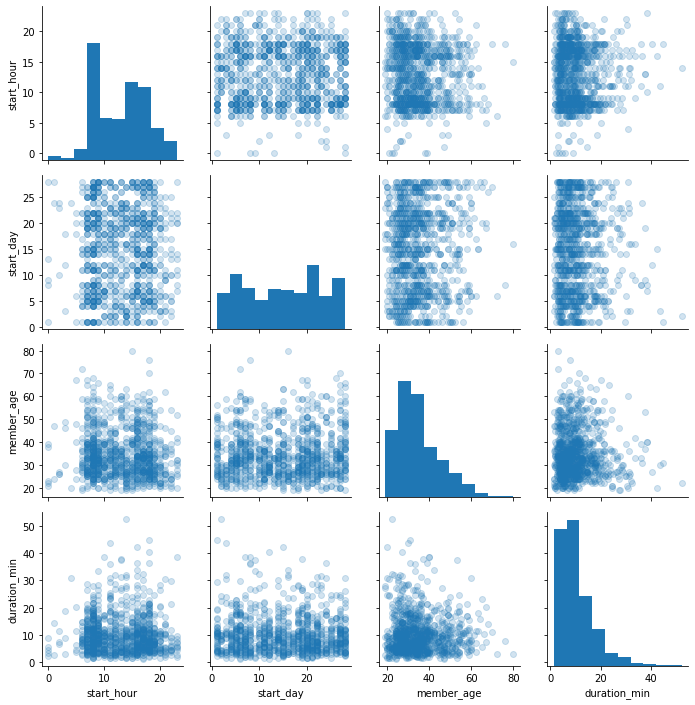

In [19]:
plt.figure(figsize = (8,4))

g=sb.PairGrid(data = bike_cut.sample(1000, random_state = 42)[['start_hour', 'start_day', 'member_age', 'duration_min']]);
g.map_offdiag(plt.scatter, alpha =0.2)
g.map_diag(plt.hist);

From the off-diagonal scatterplots in the pairgrid above, it is obvious that there is little to no correlation between the numerical features of the dataset. The diagonal histogram shows the distribution for each feature and this has further been explored in the previous section (Univariate Exploration).

#### Duration distribution across each day of the week.

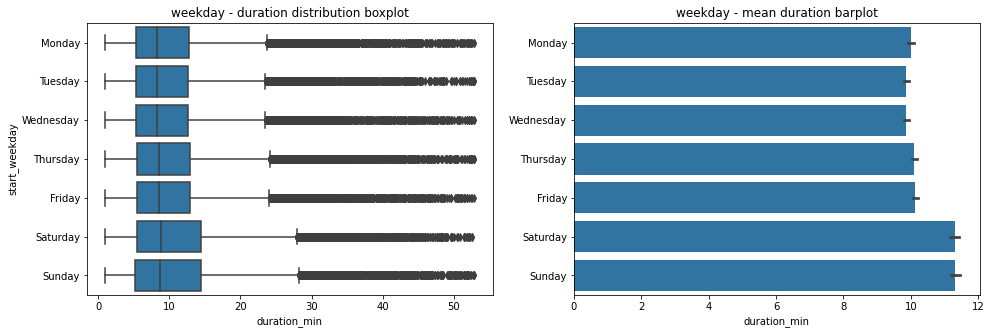

In [20]:
plt.rcParams['figure.figsize'] = 16,5

# Left subplot (boxplot)
plt.subplot(121, title = 'weekday - duration distribution boxplot')
sb.boxplot(data = bike_cut, y = 'start_weekday', x = 'duration_min', color = base_color);

# Right subplot (barplot)
plt.subplot(122, title = 'weekday - mean duration barplot' )
sb.barplot(data = bike_cut, y = 'start_weekday', x = 'duration_min', color = base_color)
plt.ylabel('');

The boxplot shows a relatively constant median duration across each weekday (Monday to Friday). A slightly higher median and 75th percentile for Saturday and Sunday. For the mean, the Saturday and Sunday also has a higher mean compared to the 5 other days, although the number of rides for both days is much smaller compared to other days as seen in the univariate distribution plot for weekdays.

#### Daily (1st to 28th) ride duration for the month of February 2019

In [21]:
# Aggregate DataFame of mean, median, minimum, and maximum ride duration for each ride start day of month (and weekday)
daily_duration=bike_cut.groupby(['start_day', 'start_weekday']).agg({'duration_min':[np.mean, np.median, np.min, np.max]}).dropna()
# print(daily_duration.columns)
# print(daily_duration.columns[0])
# print(daily_duration.index)
day_index = daily_duration.index.to_frame()['start_day'].values
weekday_index = daily_duration.index.to_frame()['start_weekday'].values

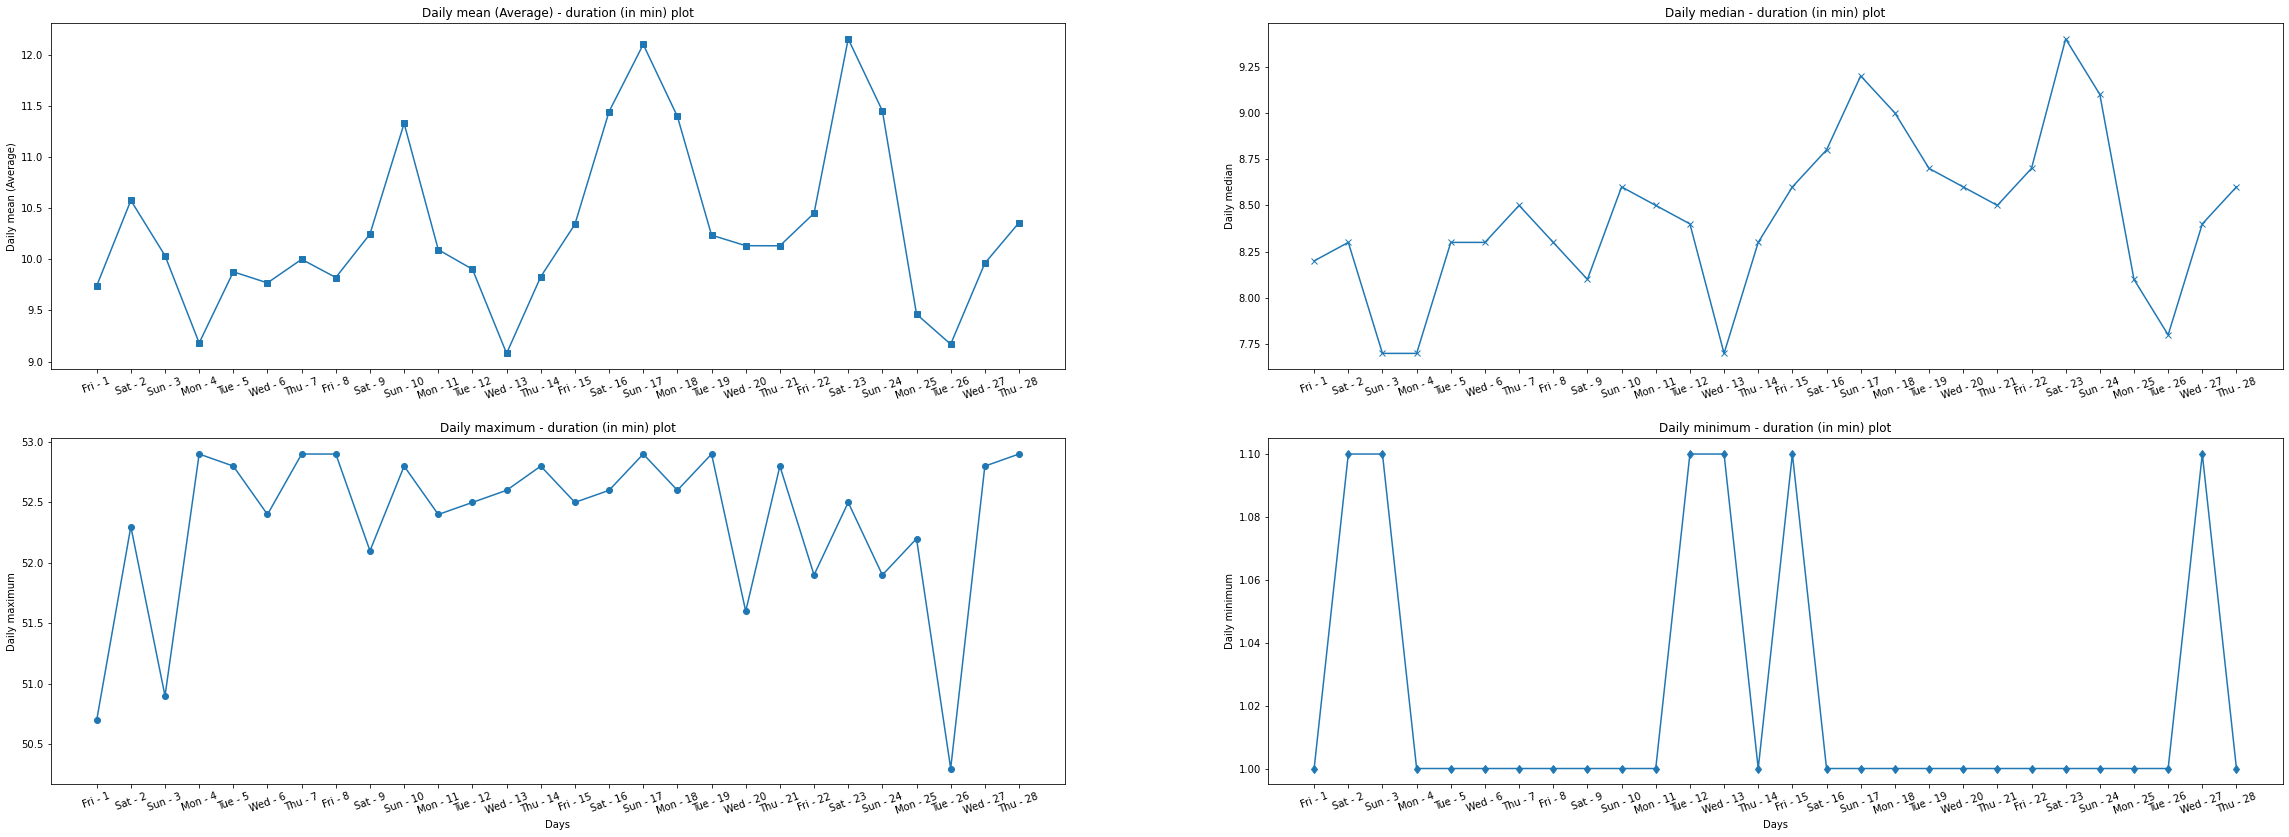

In [22]:
plt.rcParams['figure.figsize'] = 40,14

# A function that plot lineplots in different subplots
def daily_duration_plot(plot_position, plot_type, measure, marker):
    # Set supblot position and title
    plt.subplot(plot_position, title = f'Daily {plot_type} - duration (in min) plot')
    
    # Make lineplot and label x & y axis 
    plt.plot(day_index, daily_duration[('duration_min', measure)], marker=marker)
    plt.xlabel('Days')
    plt.ylabel(f'Daily {plot_type}')
    
    # Set xticks to show day of the month (1st to 28th Februray) and day of the week (Monday to Sunday)
    plt.xticks(day_index, [f'{wk[:3]} - {d}' for (wk,d) in zip(weekday_index, day_index)], rotation = 20);
    

    
# Call function with appropriate arguments (plot_position, plot_type, measure, marker)

# Mean ride duration plot (Top left)
daily_duration_plot(221, 'mean (Average)', 'mean', 's')     
plt.xlabel('')

# Median ride duration plot (Top right)
daily_duration_plot(222, 'median', 'median', 'x')    
plt.xlabel('')

# Maximum  ride duration plot (bottom left)
daily_duration_plot(223, 'maximum', 'amax', 'o')

# Minimum  ride duration plot (bottom right)
daily_duration_plot(224, 'minimum', 'amin', 'd')

From the plots showing the daily average, median, minimim and maximum ride duration, we can further drilldown into each day to have a look at the duration stats for each day of February 2019, and if there is anything to observe with the day of the week (Mon, Tue, Wed,... Sun)

#### Ride duration for each ride start-hour

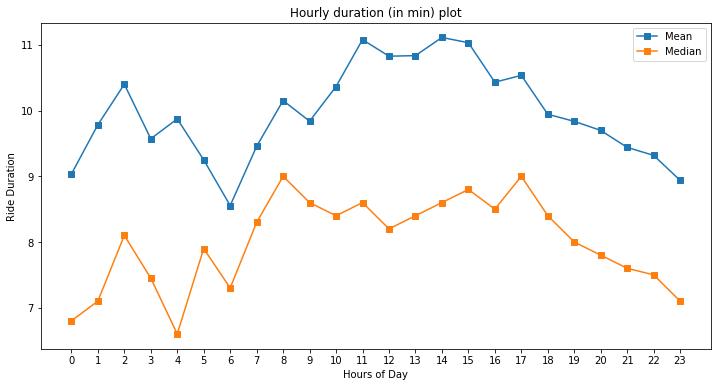

In [23]:
# Aggregate DataFame of mean, median, minimum, and maximum ride duration for each ride start hour
hourly_duration=bike_cut.groupby('start_hour').agg({'duration_min':[np.mean, np.median, np.min, np.max]})


plt.rcParams['figure.figsize'] = 12,6

# A function that plot different lineplots on the same axes 
def hourly_duration_plot(measure, marker, plot_label):
    # Values of the `measure` list represents each plot on the axes 
    plt.plot(hourly_duration.index, hourly_duration['duration_min'][measure], marker=marker, label= plot_label)
    plt.xticks(range(0,24,1))
    plt.xlabel('Hours of Day')
    plt.ylabel('Ride Duration')
    plt.legend()

# Call function. Values of the `measure` list represents each plot on the axes     
hourly_duration_plot(measure = ['mean', 'median'], marker = 's', plot_label = ['Mean','Median'])
plt.title('Hourly duration (in min) plot');


The mean and median ride duration for each start ride hour are shown in the chat above. The two plots show a very similar trend. The highest mean ride duration appears to be for ride starting around 11am to 3pm. A steady decline in mean ride duration is seen after the 15th hour.

#### Ride duration's variation with members' ages

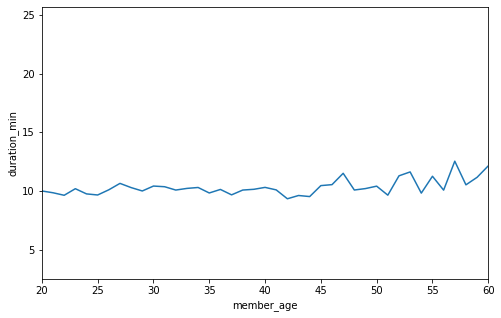

In [24]:
plt.figure(figsize=[8,5])

sb.lineplot(data = bike_cut, x = 'member_age', y = 'duration_min', ci = None)
plt.xlim((20,60));

For all rides from start to end station, there looks to be a steady duration of 10 to 11 mins for members aged between 20 to 40 years. From 40 yrs and above (the last 75th to 99th percentile), the variation in ride duration increases significantly.

#### Members Gender's relationship with ride duration 

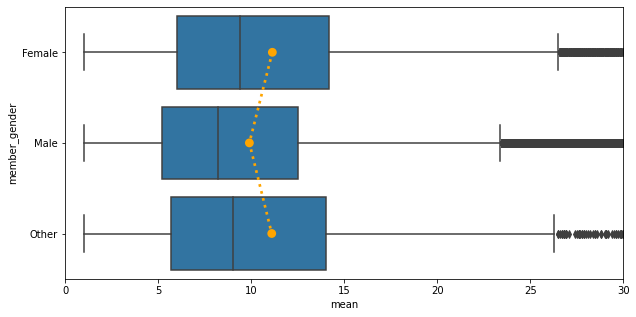

In [25]:
gender_duration = bike_cut.groupby('member_gender')['duration_min'].agg(['count', 'mean'])

plt.figure(figsize=[10,5])

# Blue boxplot
sb.boxplot(data = bike_cut, y = 'member_gender', x = 'duration_min', color = base_color);

# Orange pointplot (with dotted connection line-style). Dots indicates mean ride duration of each gender
sb.pointplot(x = gender_duration['mean'], y = gender_duration.index, linestyles=':', color = 'orange')
plt.xlim(0,30);

The pointplot (in orange) shows that on average, male subscribers typically have a lesser ride duration than female and other gender subscribers. The boxplot (in blue) show the duration quartiles for each of the gender categories.

#### Ride duration's dependency on membership type 

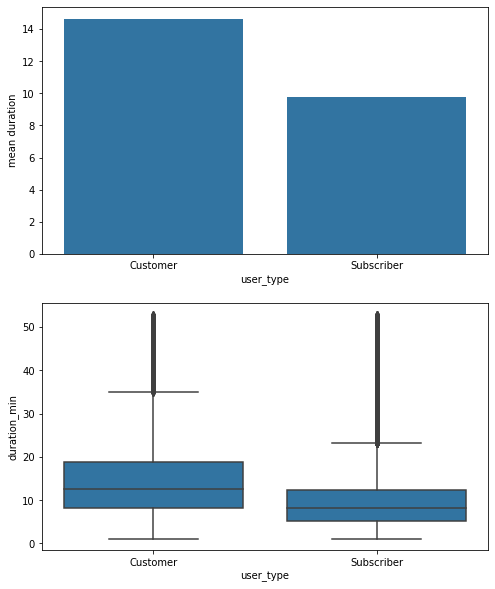

In [26]:
user_duration = bike_cut.groupby('user_type')['duration_min'].agg(['count', 'mean'])

plt.figure(figsize=[8,10])

# Top subplot (barplot) showing mean of each membership types
plt.subplot(211)
sb.barplot(y = user_duration['mean'], x = user_duration.index, color=base_color)
plt.ylabel('mean duration');

# Bottom subplot (boxplot)
plt.subplot(212)
sb.boxplot(data=bike_cut, x = 'user_type', y = 'duration_min', color = base_color);

From the barplot, the customer (about 10% of members) have a higher mean ride duration than the subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationship between the duration of ride and other features explored are superficial and none of the features seem to have a very strong influence on how long a ride lasts (duration). 3 factors that seem to influence the ride duration to a certain degree are start-hours of ride, the members' type and gender. For the last two (type and gender), it should be noted that there is an imbalance in the dataset (type, approximately 10:1. Gender, approximately  30:10:1), hence the insight from these two features may be as a result of the imbalance. 

Although largely insignificant, the member's age also seem so have some effects on the ride duration. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationships between the individual features weren't explored. The focus was on the relationship between other features and the main feature (ride duration).

## Multivariate Exploration


#### How the members gender affects the ride duration at different ride start-hour

It should be noted that about 75% of all members are male while only about 23% are female and other gender type (statistically insignificant in this case) make up the remain 2%.

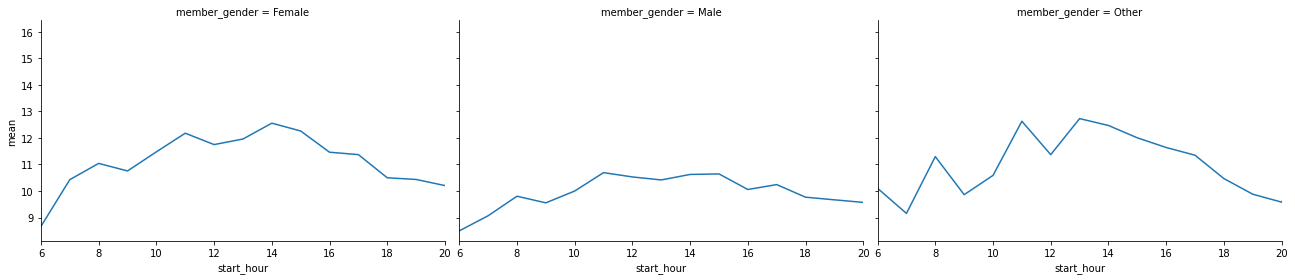

In [27]:
# Hourly_duration similar to that defined earlier in bivariate exploration but also grouped by members' gender
hourly_duration=bike_cut.groupby(['start_hour', 'member_gender']).agg({'duration_min':[np.mean, np.median, np.min, np.max]})
gender_hour_duration = hourly_duration['duration_min'][['mean', 'median']].reset_index()

# Plot splitted up into different subplots, one for each gender
g = sb.FacetGrid(data = gender_hour_duration, col = 'member_gender', height =4, aspect=1.5)

# Each subplot holding mean ride duration vs. ride start hour
g.map(plt.plot, 'start_hour', 'mean')
g.set(xlim = (6,20));


The x-axis was limited to start-hours from 6am to about 8pm. This is because the distribution of the data per start hour shows a significant reduction in rides started outside these hours (6am to 8pm). The plot above shows the relationship between the start-hours of rides and the rides' duration for each gender category. Typically, the male members spend less time riding (lesser mean ride duration) than the female members at every age group.

#### How the members type affects the ride duration at different ride start-hour

It should be noted that about 90% of all members are subscribers while only about 10% are customers. 

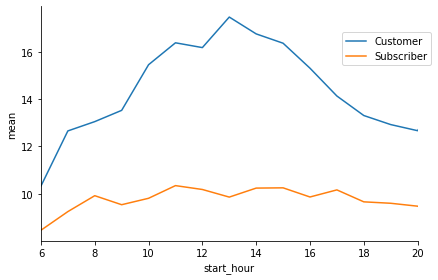

In [28]:
# Hourly_duration similar to that defined earlier in bivariate exploration but also grouped by membership/user type
hourly_duration=bike_cut.groupby(['start_hour', 'user_type']).agg({'duration_min':[np.mean, np.median, np.min, np.max]})
user_hour_duration = hourly_duration['duration_min'][['mean', 'median']].reset_index()

g = sb.FacetGrid(data = user_hour_duration, hue = 'user_type', height =4, aspect=1.5)
g.map(plt.plot, 'start_hour', 'mean')
g.set(xlim = (6,20))
plt.legend(loc =(0.8,0.75));


From the above plot, after a steady rise from 6am to 8am in the morning, the subscribers look to show a more steady mean ride duration between the hours of 8am and 8pm. The customers on the other hand, show an upward trend in the mean ride duration right from a start-hour of 6am, peaks at about 1pm start-hour and then a steady decline after that. The reason for this difference in trend (between both member types) is unclear for the provided dataset, and no inference or conclusion can be made as to the cause of this.

#### Relationship between members' age and ride duration for each member type grouped by members' gender

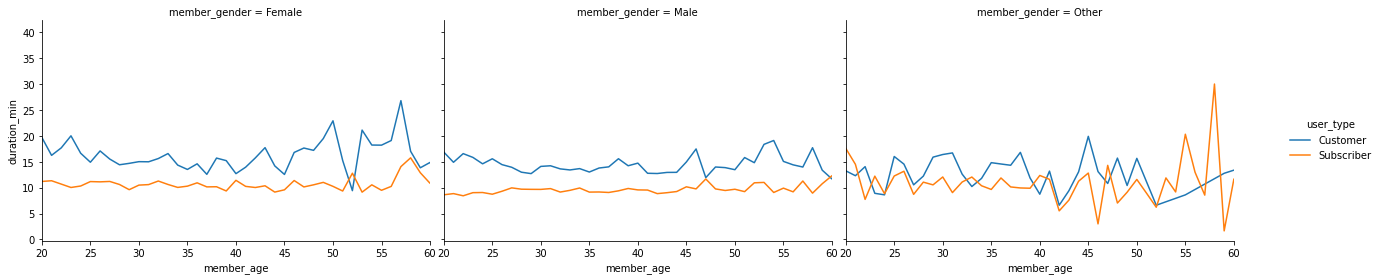

In [30]:
g=sb.FacetGrid(data = bike_cut, hue='user_type', col = 'member_gender', 
               height =4, aspect=1.5, margin_titles = True, legend_out=True)
g.map(sb.lineplot, 'member_age', 'duration_min', ci = None)
g.add_legend()
plt.xlim((20,60));

From the set of plots above, the comparison between the members' ages and ride duration for each member type is compared. This comparison has further been grouped for each gender category ('Female', 'Male', 'Other'). The result shows that the male members (and particularlly the male subscribers) shows the most steady  ride duration (around 9 to about 11 mins) of all 3 gender categories. The female subscribers between the ages of 20 and 50 also show a steady ride duration around 10 to 12 mins. Overall, for both male and female members, the subscriber (orange label) looks to have a much lower and steadier mean ride duration compared to the customers except in very few cases. Unsurprisingly, the other gender types don't look to show any insightful pattern or trend for either subscribers or customers. This is most likely due to the  relatively low sample size of these gender category in the dataset.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The features observed here (rider start-hour, members type, members gender and members age) don't seem to stenghten each other so much. What was observed is that the male typically have a lower and steadier ride duration compared to the female. The same trend (lower and steadier ride duration) goes for the subscribers in comparison to the customers. It was also observed that the rides started around lunch to afternoon (11am to 4pm) typically have a higher average duration than rides started earlier in the morning and in the evening.

### Were there any interesting or surprising interactions between features?

No unexpected interations between the features was observed.